In [24]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [25]:
d_p = 40
d_V = 20
epochs = 300    


In [26]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(80,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])



In [27]:
folder_path = "data/test_data/example_data/heat2d/"

In [28]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-17 11:24:30,283 - sciml.model.deeponet.deeponet - INFO - Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [29]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 1180.12it/s]


In [30]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [31]:
train_history = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 6901.93it/s]
2025-03-17 11:24:30.791066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,8000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-17 11:24:30.808489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,8000]
	 [[{{node Placeholder/_2}}]]
2025-03-17 11:24:30.994028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore 

In [32]:
print(train_history)

([0.3144792914390564, 0.2970014214515686, 0.2878584861755371, 0.2892649471759796, 0.28674766421318054, 0.27969467639923096, 0.27328869700431824, 0.2693660259246826, 0.26683568954467773, 0.2640807628631592, 0.26035958528518677, 0.2558897137641907, 0.25138646364212036, 0.2474522888660431, 0.24406278133392334, 0.24061350524425507, 0.2365579754114151, 0.23207396268844604, 0.22781452536582947, 0.22416606545448303, 0.2209693193435669, 0.21777372062206268, 0.2143651396036148, 0.21098564565181732, 0.20786333084106445, 0.2046341896057129, 0.20078381896018982, 0.19639146327972412, 0.19189652800559998, 0.18740656971931458, 0.18276309967041016, 0.1779729127883911, 0.17344050109386444, 0.16935190558433533, 0.16528214514255524, 0.16115812957286835, 0.1575075089931488, 0.15403786301612854, 0.15050217509269714, 0.14753274619579315, 0.14507988095283508, 0.1428283452987671, 0.14122730493545532, 0.13940519094467163, 0.13809925317764282, 0.13667337596416473, 0.13546313345432281, 0.13406971096992493, 0.132

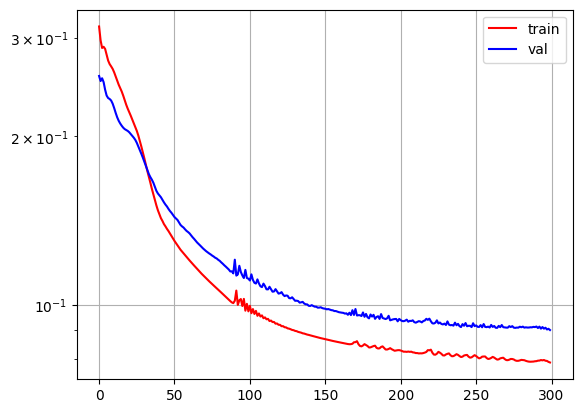

In [33]:
plt.plot(train_history[0],c='r')
plt.plot(train_history[1],c='b')
plt.legend(['train','val'])
#log 
plt.yscale('log')
plt.grid()
plt.show()

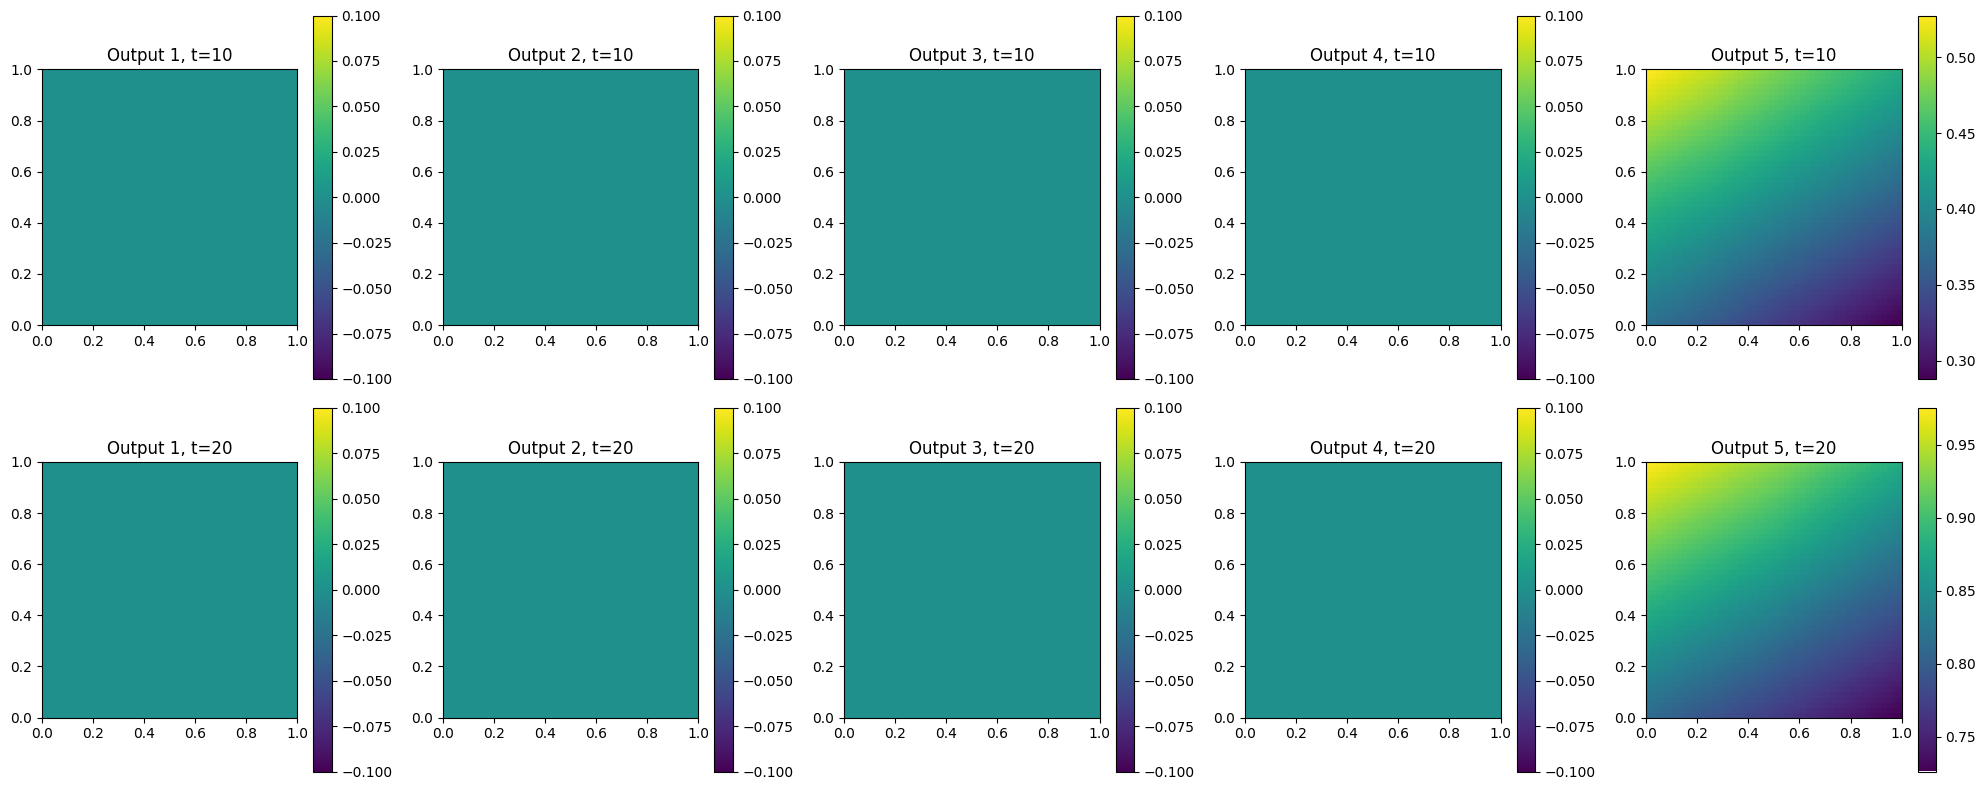

In [34]:

n_samples = 5
t_slices = [10, 20]  # Time points to visualize


x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
inputs = []

for t in t_slices:
    points = np.stack([X.flatten(), Y.flatten(), np.ones_like(X.flatten())*t], axis=-1)
    inputs.append(points)
inputs = np.concatenate(inputs, axis=0)


preds = external_model(inputs).numpy()
preds = preds.reshape(len(t_slices), 50, 50, -1)  # Reshape to (n_times, height, width, n_outputs)


fig, axes = plt.subplots(len(t_slices), 5, figsize=(20, 8))
for i, t in enumerate(t_slices):
    for j in range(5):
        im = axes[i,j].imshow(preds[i,:,:,j], cmap='viridis', extent=[0,1,0,1])
        axes[i,j].set_title(f'Output {j+1}, t={t}')
        plt.colorbar(im, ax=axes[i,j])
        
plt.tight_layout()
plt.show()